In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [4]:
df['Classes'].value_counts()

1    134
0    101
Name: Classes, dtype: int64

In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [7]:
##independent and dependent features
X=df.drop(['FWI'],axis=1)
y=df['FWI']

In [8]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [9]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
230    6.5
231    0.0
232    0.2
233    0.7
234    0.5
Name: FWI, Length: 235, dtype: float64

In [10]:
##train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
X_train.shape, X_test.shape

((157, 11), (78, 11))

In [12]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.676467,-0.365883,-0.309842,0.711902,0.509400,0.388441,0.645571,0.478822,0.534225,0.298384
RH,-0.676467,1.000000,0.232642,0.205382,-0.637994,-0.382086,-0.207138,-0.707923,-0.327026,-0.435145,-0.404101
Ws,-0.365883,0.232642,1.000000,0.271425,-0.222695,-0.030078,0.081320,-0.081242,0.011001,-0.096543,-0.224242
Rain,-0.309842,0.205382,0.271425,1.000000,-0.516920,-0.266851,-0.287468,-0.326046,-0.279126,-0.344785,-0.046983
FFMC,0.711902,-0.637994,-0.222695,-0.516920,1.000000,0.597906,0.507156,0.743233,0.583387,0.767840,0.229133
DMC,0.509400,-0.382086,-0.030078,-0.266851,0.597906,1.000000,0.878379,0.651027,0.983962,0.585690,0.194762
DC,0.388441,-0.207138,0.081320,-0.287468,0.507156,0.878379,1.000000,0.481825,0.947222,0.519160,-0.070494
ISI,0.645571,-0.707923,-0.081242,-0.326046,0.743233,0.651027,0.481825,1.000000,0.605510,0.731946,0.279477
BUI,0.478822,-0.327026,0.011001,-0.279126,0.583387,0.983962,0.947222,0.605510,1.000000,0.579434,0.097624
Classes,0.534225,-0.435145,-0.096543,-0.344785,0.767840,0.585690,0.519160,0.731946,0.579434,1.000000,0.163924


feature_seleection

<AxesSubplot: >

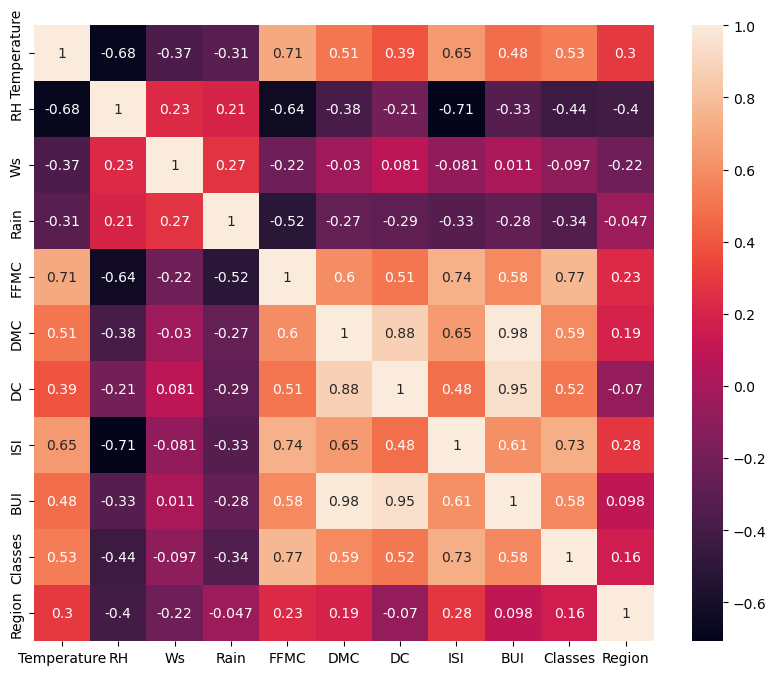

In [13]:
plt.figure(figsize=(10,8))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [14]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.676467,-0.365883,-0.309842,0.711902,0.509400,0.388441,0.645571,0.478822,0.534225,0.298384
RH,-0.676467,1.000000,0.232642,0.205382,-0.637994,-0.382086,-0.207138,-0.707923,-0.327026,-0.435145,-0.404101
Ws,-0.365883,0.232642,1.000000,0.271425,-0.222695,-0.030078,0.081320,-0.081242,0.011001,-0.096543,-0.224242
Rain,-0.309842,0.205382,0.271425,1.000000,-0.516920,-0.266851,-0.287468,-0.326046,-0.279126,-0.344785,-0.046983
FFMC,0.711902,-0.637994,-0.222695,-0.516920,1.000000,0.597906,0.507156,0.743233,0.583387,0.767840,0.229133
DMC,0.509400,-0.382086,-0.030078,-0.266851,0.597906,1.000000,0.878379,0.651027,0.983962,0.585690,0.194762
DC,0.388441,-0.207138,0.081320,-0.287468,0.507156,0.878379,1.000000,0.481825,0.947222,0.519160,-0.070494
ISI,0.645571,-0.707923,-0.081242,-0.326046,0.743233,0.651027,0.481825,1.000000,0.605510,0.731946,0.279477
BUI,0.478822,-0.327026,0.011001,-0.279126,0.583387,0.983962,0.947222,0.605510,1.000000,0.579434,0.097624
Classes,0.534225,-0.435145,-0.096543,-0.344785,0.767840,0.585690,0.519160,0.731946,0.579434,1.000000,0.163924


In [15]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [16]:
corr_features=correlation(X_train,0.85)

In [17]:
corr_features

{'BUI', 'DC'}

In [18]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_test.shape,X_train.shape

((78, 9), (157, 9))

##feature scaling and standardization

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
X_train_scaled

array([[ 0.47250941,  0.12606664, -0.99838196, ...,  0.15372483,
         0.94422787, -0.93222724],
       [-0.32231892,  0.59099027, -0.61420067, ..., -0.89354453,
        -1.05906639,  1.07269983],
       [ 0.47250941, -1.53437489,  0.92252451, ...,  2.31966827,
         0.94422787,  1.07269983],
       ...,
       [-1.91197556,  0.85666092,  0.53834322, ..., -1.03635398,
        -1.05906639, -0.93222724],
       [-0.58726169, -0.60452763, -0.61420067, ..., -0.77453664,
        -1.05906639,  1.07269983],
       [-0.58726169,  0.92307858,  2.07506839, ..., -0.8221398 ,
        -1.05906639, -0.93222724]])

/tmp/ipykernel_381/160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

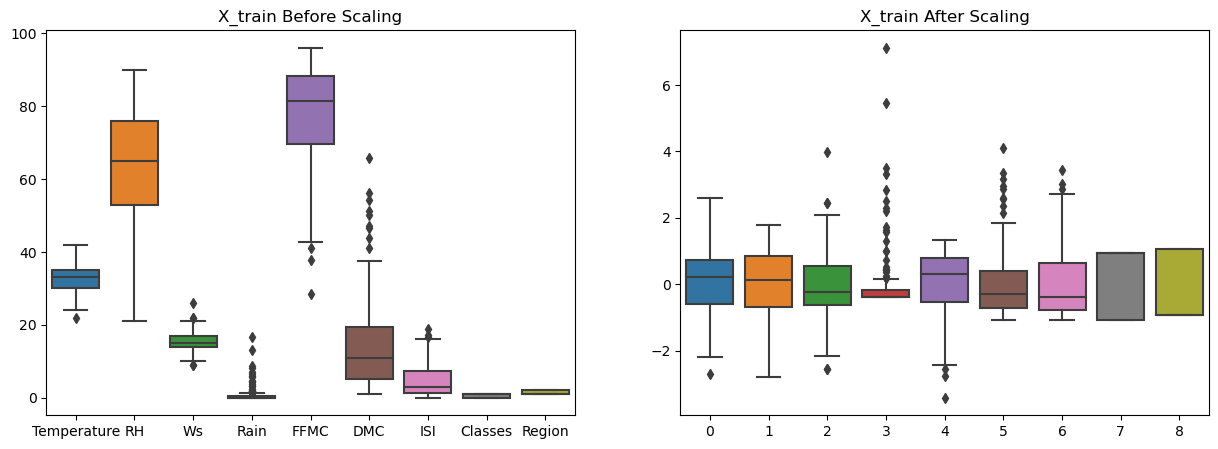

In [23]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

##linear_regression_model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [26]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.7447230889480286
R2 Score 0.977926030010293


##ridge regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.7647937136453924
R2 Score 0.9769810958788138


##lasso regression

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.3616267228714527
R2 Score 0.934428024271278


In [41]:
##elastic_net regression

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
el=ElasticNet()
el.fit(X_train_scaled,y_train)
y_pred=el.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 2.059967560205568
R2 Score 0.8577670753829961


In [30]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))